# AI/ML Assessment 2

## Imports

In [108]:
# To retrieve requirements to run this notebook, run: !pip freexe > requirements.txt, for a user to install the requirements, run: !pip install -r requirements.txt
import pandas as pd
import seaborn as sns
import plotly.express as px
import sklearn as sk
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')


In [71]:
from matplotlib import style 

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# California Housing dataset 

### Summary of California Housing Dataset:

The California Housing dataset contains features describing various geographical locations in California and targets the median house value for districts. Each data instance represents a district, and the dataset includes the following features:

- Median Income: Median income of households in the district.
- Housing Median Age: Median age of houses in the district.
- Average Rooms: Average number of rooms in houses in the district.
- Average Bedrooms: Average number of bedrooms in houses in the district.
- Population: Population of the district.
- Households: Number of households in the district.
- Latitude and Longitude: Geographic coordinates of the district.
- Median House Value: Median house value for houses in the district (target variable).

### Application of Supervised Machine Learning:

1. **Regression Analysis:**
   - The dataset can be used for regression analysis to predict the median house value based on the geographical and demographic features.
   - Various regression algorithms such as linear regression, decision trees, random forests, gradient boosting, or neural networks can be applied.
   - Performance metrics such as mean squared error (MSE), mean absolute error (MAE), root mean squared error (RMSE), and R-squared can be used to evaluate model performance.

### Application of Unsupervised Machine Learning:

1. **Clustering Analysis:**
   - Apply clustering algorithms such as K-means or DBSCAN to group similar geographical regions together based on demographic features.
   - Identify clusters of regions with similar housing characteristics, which can provide insights into spatial patterns and regional disparities.
   - Visualization techniques such as heatmaps or choropleth maps can be used to visualize cluster densities and spatial patterns of housing characteristics.

2. **Dimensionality Reduction:**
   - Use techniques like Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and visualize high-dimensional data in lower dimensions.
   - Explore underlying patterns or relationships between features and identify the most informative features that distinguish between districts.

3. **Anomaly Detection:**
   - Identify outliers or unusual patterns in the data, such as districts with significantly different housing characteristics compared to neighboring regions.
   - Anomaly detection techniques can help identify regions with unexpected housing trends or anomalies in the data, which may require further investigation.

### Summary:
The California Housing dataset offers opportunities for both supervised and unsupervised machine learning techniques. Supervised learning can be applied to predict house prices based on demographic and geographical features, while unsupervised learning can provide insights into spatial patterns, regional disparities, and anomalies within California districts. These techniques can inform urban planning, real estate development, and policy-making decisions by understanding housing market dynamics and socio-economic patterns across different regions of California.

# Data Extraction

In [61]:
# Data set description
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [62]:
# California housing data 
housing_df = fetch_california_housing(as_frame=True).frame

# First few rows of the data
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [63]:
# Input features and Target variable
print(f'Features: {fetch_california_housing().feature_names}')
print(f'Target: {fetch_california_housing().target_names}')

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']


In [64]:
# Structure of the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# EDA

In [65]:
# Numerical features to perform EDA on as Lat/Lon are geographical coordinates
numerical_features = housing_df.drop(['Latitude', 'Longitude'],axis=1)

# Summary statistics of numerical features
numerical_features.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


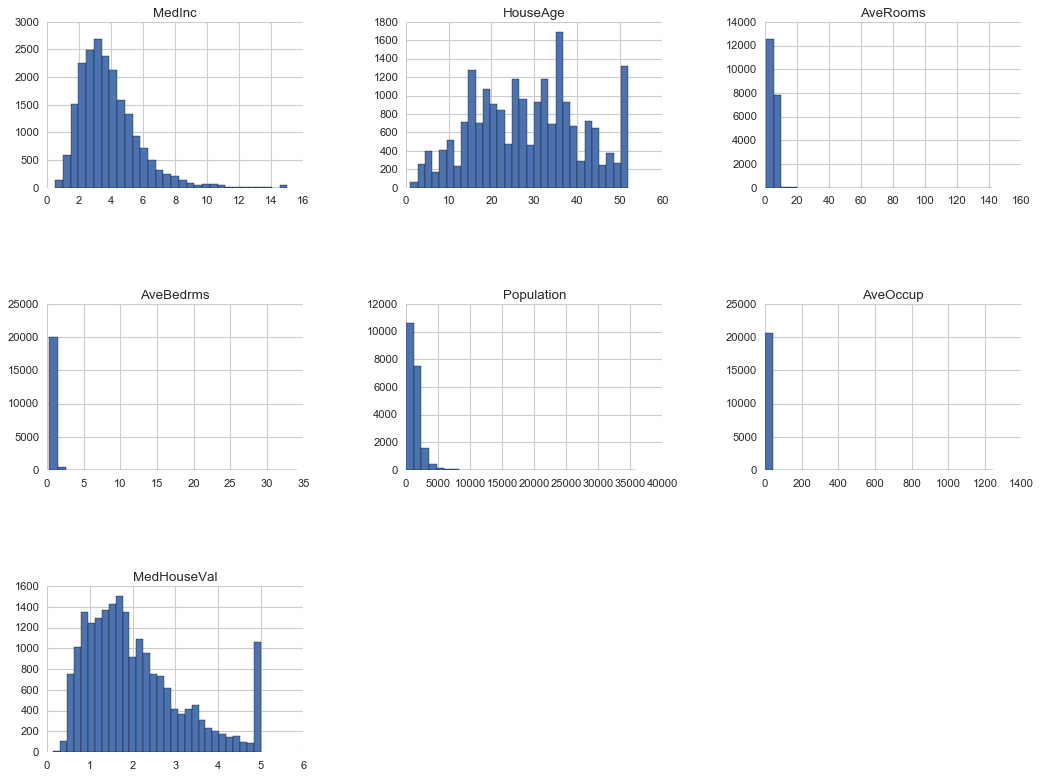

In [136]:
# Numerical Features distribution
numerical_features.hist(figsize=(14, 11),
                         bins=30,
                           edgecolor="black")

plt.subplots_adjust(hspace=0.7, wspace=0.4)

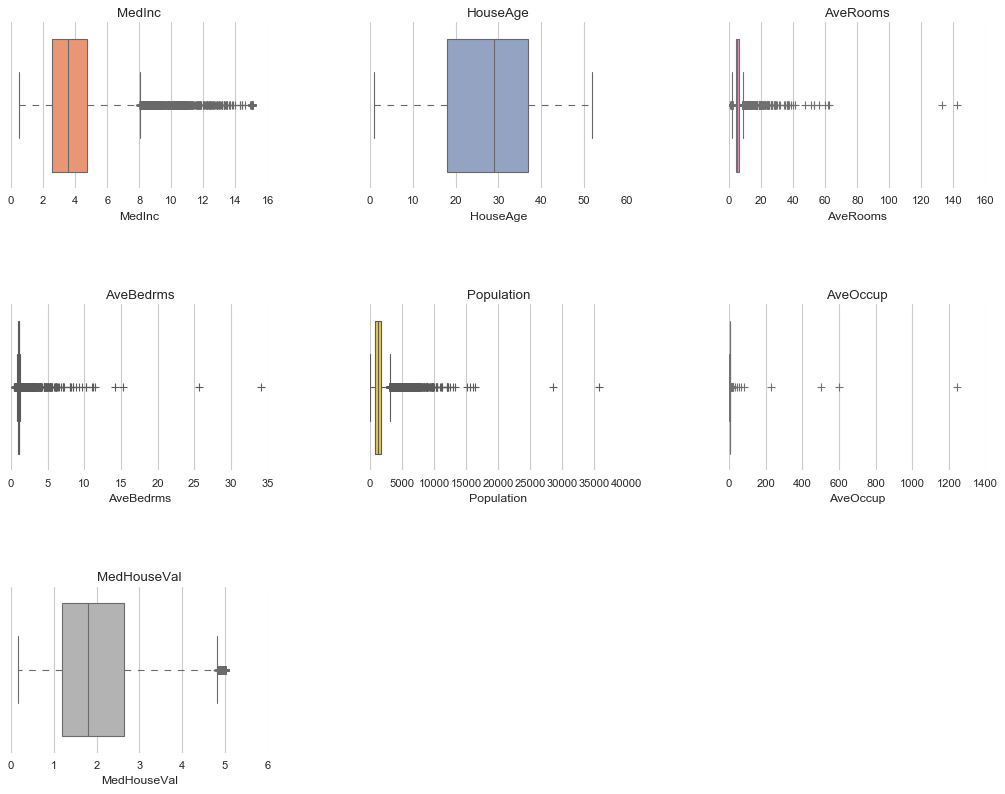

In [141]:
palette = sns.color_palette("Set2")

# Plot box plots for each numerical feature
plt.figure(figsize=(14, 11))
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=numerical_features[col], color=palette[i])
    plt.title(col)
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

<Axes: >

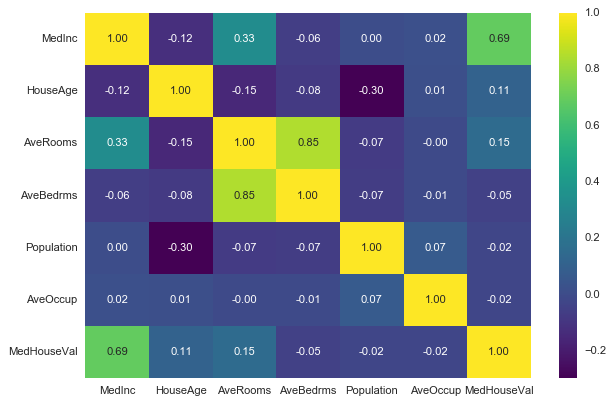

In [144]:
sns.heatmap(numerical_features.corr(),
             annot=True,
               cmap = 'viridis',
                 fmt='.2f')

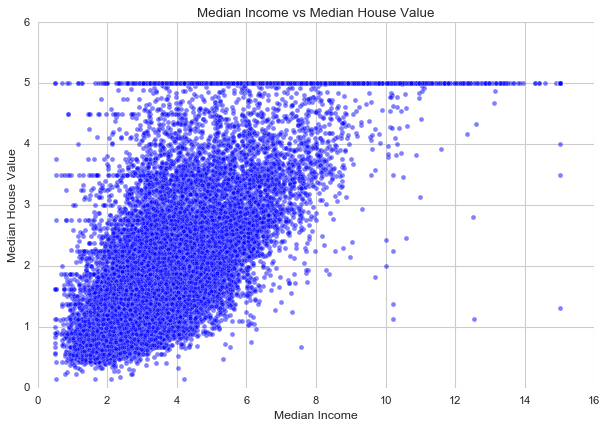

In [154]:
sns.scatterplot(x='MedInc',
                 y='MedHouseVal',
                   data=housing_df,
                     alpha=0.5)

plt.xlim(0, 16)
plt.ylim(0, 6)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value')
plt.show()

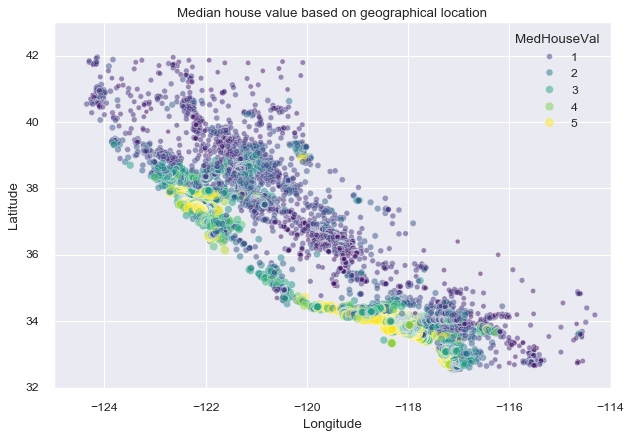

In [162]:
sns.scatterplot(data = housing_df,
                 x = "Longitude",
                   y = "Latitude",
                     size = "MedHouseVal",
                       hue = "MedHouseVal",
                         palette = "viridis",
                           alpha=0.5)

plt.ylim(32, 43)
plt.xlim(-125, -114)
plt.legend(title = "MedHouseVal")
plt.title("Median house value based on geographical location")
plt.show()

# Data Preprocessing

# Supervised ML Question

### Question: Can we predict the median house value (target variable) in California districts based on various demographic and geographical features?

# Unsupervised ML Questions
### Can the California Housing data be clustered into economic regions based on median_income?